In [55]:
#!pip install pandasql
import pandas as pd
from pandasql import sqldf


# **Importing Products Table**



In [56]:
# Reading the CSV file into a pandas DataFrame
df_products = pd.read_csv('PRODUCTS_TAKEHOME.csv', na_values=['', ' ', 'NA', 'NULL','nan'])

#Inspecting Products table
print(df_products.shape)
df_products.info()
df_products.head()

(845552, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [57]:
# Converting BARCODE to string while preserving NaNs
df_products['BARCODE'] = df_products['BARCODE'].astype(str).replace('nan', pd.NA)

# Verifying results
df_products.dtypes


,0
CATEGORY_1,object
CATEGORY_2,object
CATEGORY_3,object
CATEGORY_4,object
MANUFACTURER,object
BRAND,object
BARCODE,object


# **Counting Null values in columns**





In [58]:
# Total number of rows
total_rows = len(df_products)

# Count of null values in each column
null_counts = df_products.isnull().sum()

# Percentage of null values
null_percentage = (null_counts / total_rows) * 100
formatted_percentage = null_percentage.map('{:.2f}%'.format)

# DataFrame to display results
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': formatted_percentage
})

# Summary for the Null records
print(null_summary)

              Null Count Null Percentage
CATEGORY_1           111           0.01%
CATEGORY_2          1424           0.17%
CATEGORY_3         60566           7.16%
CATEGORY_4        778093          92.02%
MANUFACTURER      226474          26.78%
BRAND             226472          26.78%
BARCODE             4025           0.48%


Handling duplicate records

In [59]:
#count duplicate records
print(df_products.duplicated().sum())

215


In [60]:
#drop duplicate records
df_products= df_products.drop_duplicates()

In [61]:
df_products.shape

(845337, 7)

# **Importing Users Table**

In [62]:
# Reading the CSV file into a pandas DataFrame
df_user = pd.read_csv('USER_TAKEHOME.csv', dtype = {'ID':str, 'CREATED_DATE':str,'BIRTH_DATE':str}, na_values=['', ' ', 'NA', 'NULL','nan'])

#Inspecting User Data
print(df_user.shape)
df_user.head()

(100000, 6)


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [63]:
df_user.dtypes

,0
ID,object
CREATED_DATE,object
BIRTH_DATE,object
STATE,object
LANGUAGE,object
GENDER,object


In [65]:
df_user.nunique()

,0
ID,100000
CREATED_DATE,99942
BIRTH_DATE,54721
STATE,52
LANGUAGE,2
GENDER,11


# **Updating Column Name**

In [66]:
# Renaming ID column to USER_ID
df_user.rename(columns={'ID': 'USER_ID'}, inplace=True)
df_user.head()

,USER_ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


#**Updating Date column types from Object to DateTime**




In [67]:
# Converting 'created_date' and 'birth_date' to datetime
df_user['CREATED_DATE'] = pd.to_datetime(df_user['CREATED_DATE'], errors='coerce')
df_user['BIRTH_DATE'] = pd.to_datetime(df_user['BIRTH_DATE'], errors='coerce')

# Extracting only the date part
df_user['CREATED_DATE'] = df_user['CREATED_DATE'].dt.normalize()
df_user['BIRTH_DATE'] = df_user['BIRTH_DATE'].dt.normalize()

In [ ]:
df_user.dtypes

,0
USER_ID,object
CREATED_DATE,"datetime64[ns, UTC]"
BIRTH_DATE,"datetime64[ns, UTC]"
STATE,object
LANGUAGE,object
GENDER,object


# **Counting Null values in columns**

In [68]:
# Total number of rows
total_rows_user = len(df_user)

# Count of null values in each column
null_counts_user = df_user.isnull().sum()

# Percentage of null values
null_percentage_user = (null_counts_user / total_rows_user) * 100
formatted_percentage_user = null_percentage_user.map('{:.2f}%'.format)

# DataFrame to display results
null_summary_user = pd.DataFrame({
    'Null Count': null_counts_user,
    'Null Percentage': formatted_percentage_user
})

# Summary for the Null records
print(null_summary_user)

              Null Count Null Percentage
USER_ID                0           0.00%
CREATED_DATE           0           0.00%
BIRTH_DATE          3675           3.67%
STATE               4812           4.81%
LANGUAGE           30508          30.51%
GENDER              5892           5.89%


# **Checking Duplicates Records**



In [69]:
#count duplicate records
print(df_products.duplicated().sum())

0


# **Creating AGE Column**



In [70]:
# Ensuring 'BIRTH_DATE' is in datetime format for subraction from current date to get the age
df_user['BIRTH_DATE'] = pd.to_datetime(df_user['BIRTH_DATE'], errors='coerce').dt.tz_localize(None)

# Calculating the age using today's date, ensuring both are timezone-naive
df_user['AGE'] = (pd.Timestamp.now().normalize() - df_user['BIRTH_DATE']).dt.days // 365

# Handling NaN values in AGE column by filling with -1
df_user['AGE'].fillna(-1)

# Converting AGE column to integer
df_user['AGE'] = df_user['AGE'].astype('int', errors='ignore')


In [71]:
df_user.columns

Index(['USER_ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER',
       'AGE'],
      dtype='object')

# **Checking Column Uniqueness**

In [72]:
df_user['GENDER'].nunique()

11

In [73]:
df_user['GENDER'].unique()

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

# **Standardizing Gender Column Values**

In [74]:
# Standardizing gender values
df_user['GENDER'] = df_user['GENDER'].replace({
    'Non-Binary': 'non_binary',
    'Prefer not to say': 'prefer_not_to_say',
    'My gender isn\'t listed': 'not_specified',
    'not_listed': 'not_specified',
})
# Replace NaN values with 'unknown'
df_user['GENDER'] = df_user['GENDER'].fillna('unknown')

# Updated DataFrame
df_user['GENDER'].unique()

array(['female', 'unknown', 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_specified'], dtype=object)

In [75]:
df_user['STATE'].nunique()

52

In [76]:
df_user['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

In [77]:
# Replace NaN values with 'unknown'
df_user['STATE'] = df_user['STATE'].fillna('not available')

# Display the updated DataFrame
df_user['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', 'not available', 'OH', 'TX',
       'NM', 'PR', 'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH',
       'WI', 'IA', 'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI',
       'IL', 'MS', 'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV',
       'AL', 'AK', 'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'],
      dtype=object)

# **Checking Age Distribution**

In [78]:
bins = [0, 18, 35, 45, 55, 65, 75, 85, 95, 105, 120]  # Bin edges
labels = ['0-18', '19-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105', '106-120']  # Labels for bins

# Creating a new column for age categories
df_user['AGE_CATEGORY'] = pd.cut(df_user['AGE'], bins=bins, labels=labels, right=False)

# Counting user IDs in each age category
age_distribution = df_user['AGE_CATEGORY'].value_counts()

# Display the distribution
print(age_distribution)

# Get the age category with the maximum count
max_age_category = age_distribution.idxmax()
max_count = age_distribution.max()

print(f"The age category with the maximum count of user IDs is '{max_age_category}' with {max_count} users.")

AGE_CATEGORY
19-35      37918
36-45      23265
46-55      15668
56-65      10466
66-75       5128
0-18        2423
76-85       1253
86-95        130
106-120       30
96-105        21
Name: count, dtype: int64
The age category with the maximum count of user IDs is '19-35' with 37918 users.


# **Identify Outliers in BIRTH_DATE**

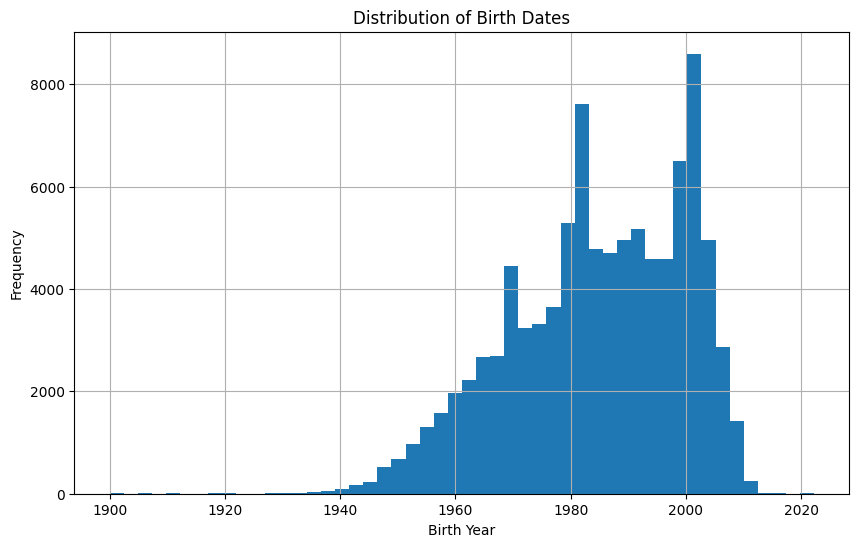

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_user['BIRTH_DATE'].hist(bins=50)
plt.title('Distribution of Birth Dates')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

Checking Distribution through Box Plot

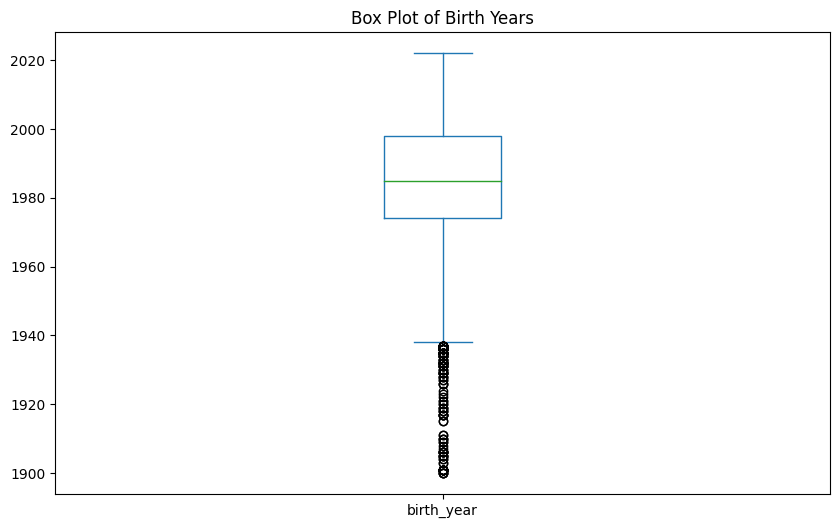

In [80]:
df_user['birth_year'] = df_user['BIRTH_DATE'].dt.year

plt.figure(figsize=(10, 6))
df_user['birth_year'].plot(kind='box')
plt.title('Box Plot of Birth Years')
plt.show()

In [81]:
df_user['BIRTH_DATE'].describe()


,BIRTH_DATE
count,96325
mean,1984-09-01 22:55:26.015053248
min,1900-01-01 00:00:00
25%,1974-03-04 00:00:00
50%,1985-10-25 00:00:00
75%,1998-02-02 00:00:00
max,2022-04-03 00:00:00


In [96]:
# Setting reasonable thresholds for birth years (e.g., 1920 to 2023)
lower_threshold = pd.Timestamp('1940-01-01')
upper_threshold = pd.Timestamp('2023-01-01')

# Identifying outliers outside of these thresholds
outliers = df_user[(df_user['BIRTH_DATE'] < lower_threshold) | (df_user['BIRTH_DATE'] > upper_threshold)]

outliers[['USER_ID']].nunique()


,0
USER_ID,152


Dropping Outliers

In [83]:
# Dropping outliers (birthdate year >1940)
df_user = df_user[(df_user['BIRTH_DATE'] >= lower_threshold) & (df_user['BIRTH_DATE'] <= upper_threshold)]
df_user.reset_index(drop=True, inplace=True)

# **Importing Transaction Table**

In [84]:
# Reading the CSV file into a pandas DataFrame
df_transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv', na_values=['', ' ', 'NA', 'NULL','nan'])
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      37500 non-null  float64
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


# **Updating data type for FINAL_QUANTITY, FINAL_SALE, PURCHASE_DATE, SCAN_DATE and BARCODE columns**

In [85]:
df_transaction['FINAL_QUANTITY'].replace(['zero', ''], 'NaN')
df_transaction['FINAL_QUANTITY'] = pd.to_numeric(df_transaction['FINAL_QUANTITY'], errors='coerce')

df_transaction['FINAL_SALE'].replace([''], '0')
df_transaction['FINAL_SALE'] = pd.to_numeric(df_transaction['FINAL_SALE'], errors='coerce')

df_transaction['PURCHASE_DATE'] = pd.to_datetime(df_transaction['PURCHASE_DATE'])

df_transaction['SCAN_DATE'] = pd.to_datetime(df_transaction['SCAN_DATE'])

# Convert BARCODE column to numeric (with NaNs)
df_transaction['BARCODE'] = pd.to_numeric(df_transaction['BARCODE'], errors='coerce')

# Convert to string while preserving NaNs
df_transaction['BARCODE'] = df_transaction['BARCODE'].astype(str).replace('nan', pd.NA)

df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  object             
 6   FINAL_QUANTITY  37500 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(4)
memory usage: 3.1+ MB


# **Checking for Null Values in Columns**

In [86]:
# Total number of rows
total_rows_trans = len(df_transaction)

# Count of null values in each column
null_counts_trans = df_transaction.isnull().sum()

# Percentage of null values
null_percentage_trans = (null_counts_trans/ total_rows_trans) * 100
formatted_percentage_trans = null_percentage_trans.map('{:.2f}%'.format)

# DataFrame to display results
null_summary_trans = pd.DataFrame({
    'Null Count': null_counts_trans,
    'Null Percentage': formatted_percentage_trans
})

# Summary for the Null records
print(null_summary_trans)

                Null Count Null Percentage
RECEIPT_ID               0           0.00%
PURCHASE_DATE            0           0.00%
SCAN_DATE                0           0.00%
STORE_NAME               0           0.00%
USER_ID                  0           0.00%
BARCODE               5762          11.52%
FINAL_QUANTITY       12500          25.00%
FINAL_SALE           12500          25.00%


Dropping rows where both FINAL_SALE and FINAL_QUANTITY are missing permanently, if any



In [87]:
df_transaction.dropna(subset=['FINAL_SALE', 'FINAL_QUANTITY'], how='all', inplace=True)

In [88]:
df_transaction.shape

(50000, 8)

# **Fill missing Final Quantity and Sales based on the average price per unity by Reciept ID and Barcode**

In [89]:
# Dropping records with NaN in sales and quantity
price_per_unit_df = df_transaction.dropna(subset=['FINAL_QUANTITY', 'FINAL_SALE']).copy()

# Calculating the average price per unit for each barcode and receipt_id
avg_price_per_barcode = (
    price_per_unit_df
    .groupby(['BARCODE', 'RECEIPT_ID'], as_index=False)
    .agg(avg_price=('FINAL_SALE', lambda x: x.sum() / price_per_unit_df.loc[x.index, 'FINAL_QUANTITY'].sum()))
)

# Merge average price back to the original DataFrame
df_transaction = df_transaction.merge(avg_price_per_barcode, on=['BARCODE', 'RECEIPT_ID'], how='left')

# Checking if avg_price column exists
if 'avg_price' in df_transaction.columns:
    # Fill missing FINAL_QUANTITY
    mask_quantity = df_transaction['FINAL_QUANTITY'].isna() & df_transaction['FINAL_SALE'].notna()
    df_transaction.loc[mask_quantity, 'FINAL_QUANTITY'] = df_transaction['FINAL_SALE'] / df_transaction['avg_price']

    # Fill missing FINAL_SALE
    mask_sale = df_transaction['FINAL_SALE'].isna() & df_transaction['FINAL_QUANTITY'].notna()
    df_transaction.loc[mask_sale, 'FINAL_SALE'] = df_transaction['FINAL_QUANTITY'] * df_transaction['avg_price']
else:
    print("avg_price column not found after merging.")

# dropping the average price column
df_transaction.drop(columns=['avg_price'], inplace=True, errors='ignore')


# **SQL Queries**

Closed-ended questions:

**1). What are the top 5 brands by receipts scanned among users 21 and over?**

Query Explanation:

This SQL query retrieves the top 5 brands based on the number of receipts scanned by users aged 21 and older. It joins the user, transaction, and product tables to count the scanned receipts (RECEIPT_ID) for each brand, filtering out users under 21 and brands with empty names. The results are grouped by brand name and ordered in descending order by the count of receipts,

Query Result:

NERDS CANDY, DOVE, TRIDENT, SOUR PATCH KIDS and MEIJER are the top 5 brands amoung user above the age of 21.

In [90]:
sql_query_top_5_brands= "Select p.BRAND, COUNT(t.RECEIPT_ID) as RECEIPT_SCANNED FROM df_user u JOIN df_transaction t on u.USER_ID = t.USER_ID JOIN df_products p on t.BARCODE=p.BARCODE where u.AGE>=21 and p.BRAND != '' GROUP BY 1 ORDER BY RECEIPT_SCANNED DESC LIMIT 5"

filtered_df = sqldf(sql_query_top_5_brands, locals())
print(filtered_df)

             BRAND  RECEIPT_SCANNED
0      NERDS CANDY                6
1             DOVE                6
2          TRIDENT                4
3  SOUR PATCH KIDS                4
4           MEIJER                4


**2). What are the top 5 brands by sales among users that have had their account for at least six months?**

Query Explanation:

This SQL query identifies the top 5 brands by total sales for users who have had their accounts for at least six months. It first joins the product, transaction, and user tables to gather data on brands, sales, and user account creation dates. The query filters for users whose account creation date is older than six months and excludes any brands with empty names.Finally, it sums the final sales for each brand, grouping the results by brand name, and orders them in descending order by total sales'

Query Result:

CVS,TRIDENT,DOVE,COORS LIGHT and TRESEMMÉ drives highest sales respectively

In [91]:
sql_query_top_brands_six_month_old = "select BRAND, sum(final_sale) as Final_Sale from (select p.BRAND,t.BARCODE, t.USER_ID, t.FINAL_SALE,u.CREATED_DATE from df_products p join df_transaction t on p.BARCODE = t.BARCODE join df_user u on t.USER_ID = u.USER_ID where u.CREATED_DATE <= DATE('now', '-6 months') ) t1 where BRAND != '' group by 1 order by final_sale desc limit 5"

# Execute the query

filtered_df = sqldf(sql_query_top_brands_six_month_old , locals())
print(filtered_df)

         BRAND  Final_Sale
0          CVS      144.00
1         DOVE       61.82
2      TRIDENT       46.72
3  COORS LIGHT       34.96
4     TRESEMMÉ       29.16


**What is the percentage of sales in the Health & Wellness category by generation?**

Query Explanation:

This SQL query calculates the percentage of total sales in the Health & Wellness category by generation. It first creates a Common Table Expression (CTE) named total_HW_sales, which sums the final sales for all products in the Health & Wellness category. Then, it generates another CTE called sales_by_gen,which categorizes users into generations based on their age and sums their final sales for Health & Wellness products.Finally, the query calculates the percentage of sales for each generation by dividing the sales of each generation by the total Health & Wellness sales and formatting the result as a percentage.

Query Result:

Baby Boomers bring highest pecent of sales in Health and Wellness category.

In [92]:
percentage_of_sales = "with total_HW_sales as (select category_1, sum(final_sale) total_sales from df_products join df_transaction using(BARCODE) where category_1 = 'Health & Wellness' group by 1 ),sales_by_gen AS (SELECT CASE WHEN u.AGE BETWEEN 18 AND 25 THEN 'Gen Z' WHEN u.AGE BETWEEN 26 AND 40 THEN 'Millennials' WHEN u.AGE BETWEEN 41 AND 56 THEN 'Gen X' WHEN u.AGE BETWEEN 57 AND 75 THEN 'Baby Boomers'ELSE 'Silent Generation' END AS generation, SUM(t.FINAL_SALE) AS FINAL_SALE FROM df_products p JOIN df_transaction t ON p.BARCODE = t.BARCODE JOIN df_user u ON t.USER_ID = u.USER_ID WHERE p.CATEGORY_1 = 'Health & Wellness' GROUP BY generation)SELECT generation as GENERATION, ROUND((FINAL_SALE / total_HW_sales.total_sales) * 100, 2) || '%' AS PERCENTAGE_OF_SALES FROM sales_by_gen, total_HW_sales "
filtered_df = sqldf(percentage_of_sales, locals())
print(filtered_df)

          GENERATION PERCENTAGE_OF_SALES
0       Baby Boomers               0.32%
1              Gen X               0.18%
2        Millennials               0.07%
3  Silent Generation               0.01%


**Open-ended questions:**

**Which is the leading brand in the Dips & Salsa category?**

Query Explanation:

This SQL query identifies the leading brand in the Dips & Salsa category by summing the final sales associated with each brand. It selects the category_2 and brand from the product table, joining it with the transaction table using the common BARCODE field. The query filters for entries where the category is Dips & Salsa and the brand is not null or empty. It groups the results by category and brand, orders them by the total final sales in descending order, and limits the output to the top result.

Query Result:

TOSTITOS is the leading brand in Dips & Salsa category.

In [93]:
leading_dips_salsa = "SELECT p.CATEGORY_2 as CATEGORY, p.BRAND, sum(t.FINAL_SALE) FINAL_SALE FROM df_transaction t join df_products p using(BARCODE) where p.CATEGORY_2 = 'Dips & Salsa' and (BRAND is not null and BRAND != '') group by 1,2 Order by FINAL_SALE DESC limit 1"
filtered_df = sqldf(leading_dips_salsa, locals())
print(filtered_df)

       CATEGORY     BRAND  FINAL_SALE
0  Dips & Salsa  TOSTITOS       362.6


**At what percent has Fetch grown year over year?**

Query Explanation:

This SQL query calculates the year-over-year (YoY) growth in account creation by first aggregating the total number of accounts created each year from the user table. It uses the STRFTIME function to extract the year from the CREATED_DATE column and groups the results by year. The outer query then
computes the difference in the number of accounts created compared to the previous year using the LAG function. It also calculates the YoY growth percentage by comparing the current year's accounts created to the previous year's total

Query Result:

From the data provided, in the year 2023 and till September 2024, Fetch has seen decline in accounts created by users.

In [94]:
yoy_growth = "WITH yearly_accounts AS (SELECT STRFTIME('%Y', CREATED_DATE) AS year, COUNT(USER_ID) AS accounts_created FROM df_user WHERE CREATED_DATE IS NOT NULL GROUP BY year ORDER BY year ASC) SELECT year, accounts_created, (accounts_created - LAG(accounts_created) OVER (ORDER BY year)) AS difference, (100.0 * (accounts_created - LAG(accounts_created) OVER (ORDER BY year)) / LAG(accounts_created) OVER (ORDER BY year)) AS yoy_growth FROM yearly_accounts"
filtered_df = sqldf(yoy_growth, locals())
print(filtered_df)

    year  accounts_created  difference  yoy_growth
0   2014                30         NaN         NaN
1   2015                50        20.0   66.666667
2   2016                69        19.0   38.000000
3   2017               642       573.0  830.434783
4   2018              2165      1523.0  237.227414
5   2019              7089      4924.0  227.436490
6   2020             16874      9785.0  138.030752
7   2021             19138      2264.0   13.417091
8   2022             26797      7659.0   40.019856
9   2023             13342    -13455.0  -50.210844
10  2024             10074     -3268.0  -24.494079


**Who are Fetch’s power users?**

Query Explanation:

This SQL query identifies power users by categorizing them into age groups based on their age and counting the number of receipts scanned by each group. It uses a CASE statement to define age ranges (e.g., 'Under 20', '20-29', '30-39', etc.) and joins the transaction table with he user and products tables to gather relevant data. The results are grouped by age group and ordered by the receipt count in descending order.

Query Result:

From the data User above the age 60 are the power users i.e. those are the people who scanned more receipts compared to other age groups in the data

In [95]:
power_users = "SELECT CASE WHEN u.AGE < 20 THEN 'Under 20' WHEN u.AGE BETWEEN 20 AND 29 THEN '20-29' WHEN u.AGE BETWEEN 30 AND 39 THEN '30-39' WHEN u.AGE BETWEEN 40 AND 49 THEN '40-49' WHEN u.AGE BETWEEN 50 AND 59 THEN '50-59' ELSE '60+' END AS age_group, COUNT(t.RECEIPT_ID) AS receipt_count FROM df_transaction t JOIN df_user u ON t.USER_ID = u.USER_ID JOIN df_products p ON t.BARCODE = p.BARCODE GROUP BY age_group ORDER BY receipt_count DESC"
filtered_df = sqldf(power_users, locals())
print(filtered_df)

  age_group  receipt_count
0       60+             40
1     40-49             38
2     50-59             34
3     30-39             30
4     20-29              2
